In [11]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num words means keeping only the top 10,000 most frequent words in the data

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #10000 length array in each list; matrix length is len(sequences)
  #print(results)
  for i, sequence in enumerate(sequences):
    #print(i, " ", results, " ", sequence)
    #print(i)
    results[i, sequence] = 1. #values in sequence will be treated as an index of results and then elements in those indexes will be turned to 1's
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
#when inputs are vectors and labels are scalars, the best type of network is a stack of fully connected Dense layers with relu activations
#Dense(16, activation='relu') - 16 hidden units of the layer

#input: vectorized text -> sequential layers (16 units dense layer -> 16 unit -> 1 layer sigmoid) -> output

from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu')) #adjusts to input size to output size of previous layer
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#can also pass in objects as arguments

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [16]:
#here 10000 samples are set apart to be validation data (to test the accuracy of my model it has never seen before)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train, partial_y_train, 512, 20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.5239 - binary_accuracy: 0.7877 - val_loss: 0.4022 - val_binary_accuracy: 0.8438
Epoch 2/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.3056 - binary_accuracy: 0.9001 - val_loss: 0.3044 - val_binary_accuracy: 0.8878
Epoch 3/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.2212 - binary_accuracy: 0.9278 - val_loss: 0.2788 - val_binary_accuracy: 0.8913
Epoch 4/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1709 - binary_accuracy: 0.9463 - val_loss: 0.2836 - val_binary_accuracy: 0.8869
Epoch 5/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1407 - binary_accuracy: 0.9543 - val_loss: 0.2861 - val_binary_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1117 - binary_accuracy: 0.9649 - val_loss: 0.3148 - val_bi

In [18]:
print(history.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


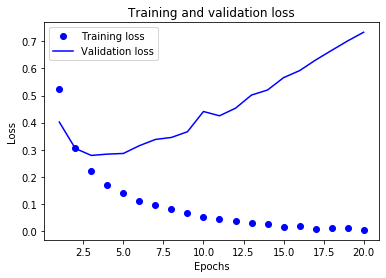

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] #validation loss

epochs = range(1, len(history_dict['binary_accuracy']) + 1) #threshold = 0.5

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

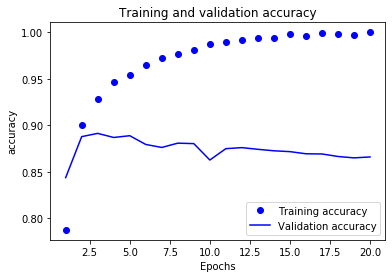

In [21]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy'] #validation loss

plt.plot(epochs, acc_values, 'bo', label='Training accuracy') #bo is for blue dot
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

# correct = 0
# wrong = 0
# for i in range(len(predictions)):
#   if predictions[i] >= 0.95 and test_labels[i] == 1 or predictions[i] < 0.95 and test_labels[i] == 0:
#     correct+=1
#   elif predictions[i] < 0.95 and test_labels[i] or predictions[i] >= 0.95 and test_labels[i] == 0:
#     wrong+=1
# print("accuracy", correct/(wrong + correct))

model.test_on_batch(x_test, test_labels)